In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import string
import matplotlib.pyplot as plt
from datasets import sign_language
np.random.seed(5) 

In [2]:
(x_train,y_train),(x_test,y_test)=sign_language.load_data("datasets")


In [3]:
y_train.size

16000

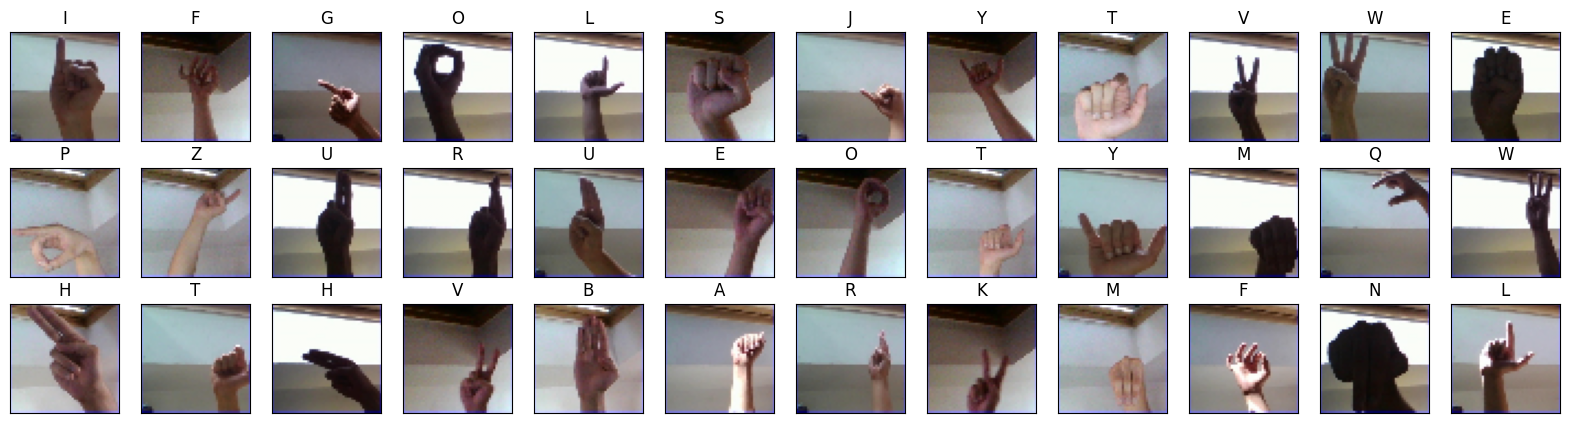

In [4]:
labels=list(string.ascii_uppercase)
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(labels[y_train[i]]))
plt.show()

In [5]:
print(["{letter}:{count}".format(letter=v,count=np.sum(y_train==i)) for i,v in enumerate(labels)]) 

['A:587', 'B:611', 'C:620', 'D:585', 'E:600', 'F:624', 'G:612', 'H:604', 'I:603', 'J:634', 'K:622', 'L:586', 'M:626', 'N:600', 'O:607', 'P:633', 'Q:619', 'R:615', 'S:600', 'T:606', 'U:631', 'V:697', 'W:621', 'X:631', 'Y:603', 'Z:623']


In [6]:
from keras.utils import to_categorical

In [7]:
#one-hot
OH_train=to_categorical(y_train)
OH_test=to_categorical(y_test)


In [8]:
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Flatten,Dense
from keras.models import Sequential

In [13]:
model=Sequential()
model.add(Conv2D(filters=20, kernel_size=10,padding="same",activation="relu",input_shape=(50,50,3)))

model.add(MaxPooling2D(pool_size=4))
model.add(Conv2D(filters=50, kernel_size=10,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=4))
model.add(Flatten())
model.add(Dense(26,activation="softmax"))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 20)        6020      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 10)        20010     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 10)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 90)                0         
                                                                 
 dense_1 (Dense)             (None, 26)               

In [14]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(x_train, OH_train,
                validation_split=0.20,
                epochs=5,
                batch_size=32)

Epoch 1/5
400/400 [==============================] - 22s 52ms/step - loss: 2.8766 - accuracy: 0.1599 - val_loss: 2.0677 - val_accuracy: 0.3747
Epoch 2/5
400/400 [==============================] - 21s 52ms/step - loss: 1.6417 - accuracy: 0.4891 - val_loss: 1.4106 - val_accuracy: 0.5437
Epoch 3/5
400/400 [==============================] - 20s 49ms/step - loss: 1.1541 - accuracy: 0.6344 - val_loss: 1.0432 - val_accuracy: 0.6722
Epoch 4/5
400/400 [==============================] - 21s 52ms/step - loss: 0.8876 - accuracy: 0.7190 - val_loss: 0.8894 - val_accuracy: 0.7203
Epoch 5/5
400/400 [==============================] - 19s 48ms/step - loss: 0.7349 - accuracy: 0.7682 - val_loss: 0.7681 - val_accuracy: 0.7519


In [15]:
score = model.evaluate(x=x_test,  y=OH_test)
print('test succes rate:', score[1])

125/125 [==============================] - 4s 29ms/step - loss: 0.7282 - accuracy: 0.7675
test succes rate: 0.7674999833106995


125/125 [==============================] - 5s 35ms/step


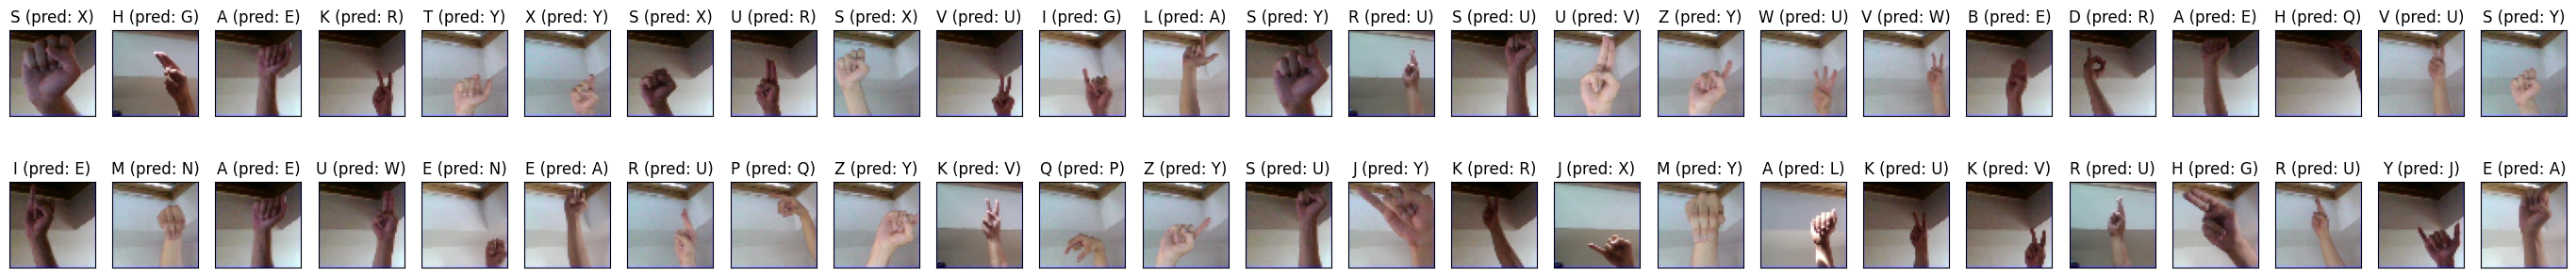

In [12]:
y_probs = model.predict(x_test)
y_preds = np.argmax(y_probs, axis=1)
bad_test_id = np.where(y_preds != y_test)[0]
bad_test_id=bad_test_id[:50]
fig = plt.figure(figsize=(35,8))
for i, id in enumerate(bad_test_id):
    ax = fig.add_subplot(4, int(np.ceil(len(bad_test_id)/2)), i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[id]))
    ax.set_title("{} (pred: {})".format(labels[y_test[id]], labels[y_preds[id]]))